In [2]:
import torchvision.transforms as transforms 
import PIL 
import matplotlib.pyplot as plt

In [3]:
#PIL image module to open our images 
from PIL import Image

In [4]:
#list of all our image file paths 
images = ["/kaggle/input/birds-and-lions/a-g-YuQgNYku1M8-unsplash.jpg","/kaggle/input/birds-and-lions/aarn-giri-3lGi0BXJ1W0-unsplash.jpg", "/kaggle/input/birds-and-lions/andrew-pons-lylCw4zcA7I-unsplash.jpg", "/kaggle/input/birds-and-lions/arleen-wiese-2vbhN2Yjb3A-unsplash.jpg", "/kaggle/input/birds-and-lions/boris-smokrovic-DPXytK8Z59Y-unsplash.jpg", "/kaggle/input/birds-and-lions/boris-smokrovic-HWwF4OnXAdM-unsplash.jpg", "/kaggle/input/birds-and-lions/chris-smith-ZeIFgSO3MAU-unsplash.jpg", "/kaggle/input/birds-and-lions/elie-khoury-GidYc-pS9sM-unsplash.jpg", "/kaggle/input/birds-and-lions/eric-combeau-Tw0eeOOzCVs-unsplash.jpg", "/kaggle/input/birds-and-lions/eric-combeau-Tw0eeOOzCVs-unsplash.jpg", "/kaggle/input/birds-and-lions/francesco-ZxNKxnR32Ng-unsplash.jpg", "/kaggle/input/birds-and-lions/hans-jurgen-mager-Fbdr6gXJBVY-unsplash.jpg", "/kaggle/input/birds-and-lions/jacques-le-henaff-ic-13C3QhAI-unsplash.jpg", "/kaggle/input/birds-and-lions/jan-meeus-7LsuYqkvIUM-unsplash.jpg", "/kaggle/input/birds-and-lions/jean-wimmerlin-FC4GY9nQuu0-unsplash.jpg", "/kaggle/input/birds-and-lions/kevin-mueller-aeNg4YA41P8-unsplash.jpg", "/kaggle/input/birds-and-lions/mika-brandt-UlipBbZpweg-unsplash.jpg", "/kaggle/input/birds-and-lions/vincent-van-zalinge-vUNQaTtZeOo-unsplash.jpg", "/kaggle/input/birds-and-lions/vittorio-zamboni-iq96SvUkuxQ-unsplash.jpg", "/kaggle/input/birds-and-lions/waldemar-MjsIHh1rFkM-unsplash.jpg", "/kaggle/input/birds-and-lions/zdenek-machacek-UxHol6SwLyM-unsplash.jpg"]

#o is a bird and 1 is a lion ordered the same way as the files
labels = [1,0,0,1,0,0,0,1,1,1,1,0,0,1,0,1,0,0,1,1]

transform = transforms.Compose([
    #resized for the minimum side to be 224
    transforms.Resize(size=224),
    #resixed into a square of both sizes 224
    transforms.CenterCrop(224),
    #image to tensor
    transforms.ToTensor(),
    #converting to black and white
    transforms.Grayscale(num_output_channels=1),
    #random 15º roatation
    transforms.RandomRotation(15),
    #normalize to mean 0 standard deviation 1
    transforms.Normalize([0.0], [1.0]),
    ])


#Importing the dataset class 
from torch.utils.data import Dataset 

#creating a custom dataset using the Dataset class
class birdsAndLions(Dataset):
    #initializing the dataset  with our data and transformations
    def __init__(self,images,labels,transform):
        self.images = images
        self.labels = labels
        self.transform = transform
    
    #
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self,index):
        #list of images
        image_path = self.images[index]
        #list of labels
        label = self.labels[index]
        
        #open the image
        image = Image.open(image_path)
        #transform the image
        image = self.transform(image)
        return image,label

#images = transform(images)
#Image.open(images[0])

In [5]:
from torch.utils.data import DataLoader

dataset= birdsAndLions(images,labels,transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle= True)

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 1)


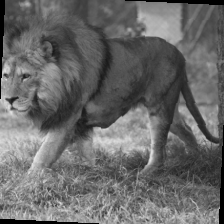

In [10]:
#image = images[1].squeeze()
#plt.imshow(images[1])
#plt.show()
#print("The label of this is" + str(labels[1]) + " ." )
print(dataset[10])
dataexample = dataset[10] 
backtoimage = transforms.ToPILImage()
backtoimage(dataexample[0])